# Clustering For 'Crime Data'

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
Crime = pd.read_csv('crime_data (1).csv')
Crime.head()

,places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
Crime.columns

Index(['places', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
Crime1 = Crime.drop('places', axis=1)

In [6]:
Crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
Crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [10]:
Crime1[Crime.duplicated(keep=False)]

,Murder,Assault,UrbanPop,Rape


#### Power Transformation

In [18]:
Crime2 = Crime1[['Murder', 'Assault', 'UrbanPop', 'Rape']].values
Crime2_transformed = power_transform(Crime2, method='yeo-johnson')

In [20]:
Crime2=pd.DataFrame(Crime2_transformed,columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
Crime2                    

,Murder,Assault,UrbanPop,Rape
0,1.193980,0.823923,-0.558080,0.171772
1,0.612467,1.088030,-1.217271,1.991841
2,0.218738,1.376029,1.018593,1.074267
3,0.368945,0.338847,-1.088646,-0.018283
4,0.410700,1.210644,1.863606,1.753540
5,0.174586,0.491797,0.868778,1.630508
6,-1.067484,-0.662226,0.794329,-1.219506
7,-0.303151,0.843957,0.426773,-0.483166
8,1.550184,1.735861,1.018593,1.144802
9,1.850420,0.566425,-0.421616,0.630284


## Hierarchial Clustering

###  'Average' linkage Method

Text(0.5, 1.0, 'Dendogram')

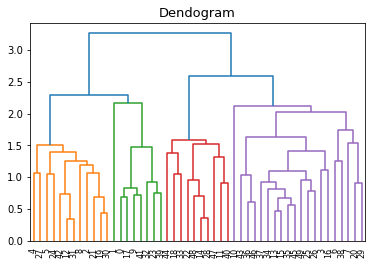

In [23]:
dendrogram = sch.dendrogram(sch.linkage(Crime2_transformed, method='average'))
plt.title("Dendogram",size=13)

In [24]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [25]:
y_hc1 = hc1.fit_predict(Crime2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [26]:
Crime['cluster']=y_hc1

In [27]:
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.965000,136.600000,69.950000,18.460000
1,1,10.883333,256.916667,78.333333,32.250000
2,2,2.680000,70.100000,51.000000,10.910000
3,3,14.671429,251.285714,54.285714,21.685714
4,4,10.000000,263.000000,48.000000,44.500000


In [30]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Crime[Crime['cluster'] == i]['places'].values)))
    print()

cluster 0
Total Members: 20

cluster 1
Total Members: 12

cluster 2
Total Members: 10

cluster 3
Total Members: 7

cluster 4
Total Members: 1



### 'Centroid(Ward)' linkage method

Text(0.5, 1.0, 'Dendogram')

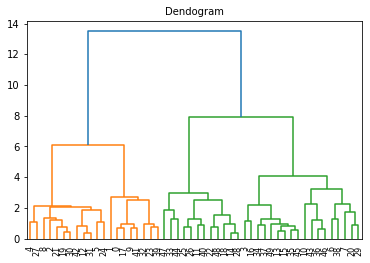

In [33]:
dendrogram = sch.dendrogram(sch.linkage(Crime2_transformed, method='ward'))
plt.title("Dendogram",size=10)

In [34]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [35]:
y_hc2 = hc2.fit_predict(Crime2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [36]:
Crime['cluster'] = y_hc2

In [37]:
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.644444,144.444444,79.222222,18.766667
1,1,14.087500,252.750000,53.500000,24.537500
2,2,3.091667,76.000000,52.083333,11.833333
3,3,10.883333,256.916667,78.333333,32.250000
4,4,7.466667,135.666667,63.444444,18.600000


In [39]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Crime[Crime['cluster'] == i]['places'].values)))
    print()

cluster 0
Total Members: 9

cluster 1
Total Members: 8

cluster 2
Total Members: 12

cluster 3
Total Members: 12

cluster 4
Total Members: 9



### 'Complete' linkage method

Text(0.5, 1.0, 'Dendogram')

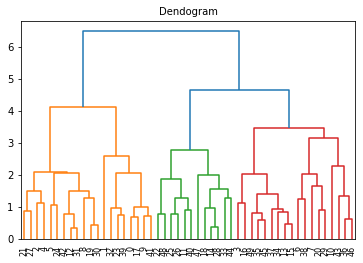

In [40]:
dendrogram = sch.dendrogram(sch.linkage(Crime2_transformed, method='complete'))
plt.title("Dendogram",size=10)

In [41]:
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc3 = hc3.fit_predict(Crime2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [42]:
Crime['cluster'] = y_hc3
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.644444,144.444444,79.222222,18.766667
1,1,14.087500,252.750000,53.500000,24.537500
2,2,3.091667,76.000000,52.083333,11.833333
3,3,10.883333,256.916667,78.333333,32.250000
4,4,7.466667,135.666667,63.444444,18.600000


In [43]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Crime[Crime['cluster'] == i]['places'].values)))
    print()

cluster 0
Total Members: 9

cluster 1
Total Members: 8

cluster 2
Total Members: 12

cluster 3
Total Members: 12

cluster 4
Total Members: 9



### 'Single' linkage method

Text(0.5, 1.0, 'Dendogram')

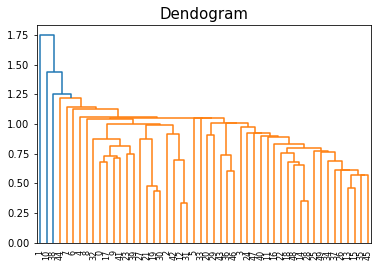

In [44]:
dendrogram = sch.dendrogram(sch.linkage(Crime2_transformed, method='single'))
plt.title("Dendogram",size=15)

In [45]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(Crime2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
Crime['cluster'] = y_hc4
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.01087,174.065217,65.804348,21.247826
1,1,2.20000,48.000000,32.000000,11.200000
2,2,5.30000,46.000000,83.000000,20.200000
3,3,10.00000,263.000000,48.000000,44.500000
4,4,3.40000,174.000000,87.000000,8.300000


In [46]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Crime[Crime['cluster'] == i]['places'].values)))
    print()

cluster 0
Total Members: 46

cluster 1
Total Members: 1

cluster 2
Total Members: 1

cluster 3
Total Members: 1

cluster 4
Total Members: 1



In [49]:
C=Crime .iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [50]:
C

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.01087,174.065217,65.804348,21.247826
1,1,2.20000,48.000000,32.000000,11.200000
2,2,5.30000,46.000000,83.000000,20.200000
3,3,10.00000,263.000000,48.000000,44.500000
4,4,3.40000,174.000000,87.000000,8.300000


In [51]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Crime[Crime['cluster'] == i]['places'].values)))
    print()

cluster 0
Total Members: 46

cluster 1
Total Members: 1

cluster 2
Total Members: 1

cluster 3
Total Members: 1

cluster 4
Total Members: 1



### DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Crime2)

DBSCAN(eps=0.8, min_samples=6)

In [53]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [54]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])

In [55]:
cl

,cluster_db
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [56]:
Crime3 = pd.concat([Crime,cl],axis=1)

In [57]:
Crime3

,places,Murder,Assault,UrbanPop,Rape,cluster,cluster_db
0,Alabama,13.2,236,58,21.2,0,-1
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,0,-1
3,Arkansas,8.8,190,50,19.5,0,-1
4,California,9.0,276,91,40.6,0,-1
5,Colorado,7.9,204,78,38.7,0,-1
6,Connecticut,3.3,110,77,11.1,0,-1
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,0,-1
9,Georgia,17.4,211,60,25.8,0,-1


In [58]:
Crime

,places,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


Importing the Metrics for calcilating Silhouette Score

In [59]:
s1=(metrics.silhouette_score(Crime2_transformed,y_hc1))
s1

0.3299113590156865

In [60]:
s2=(metrics.silhouette_score(Crime2_transformed,y_hc2))
s2

0.28966401626107185

In [61]:
s3=(metrics.silhouette_score(Crime2_transformed,y_hc3))
s3

0.28966401626107185

In [62]:
s4=(metrics.silhouette_score(Crime2_transformed,y_hc4))
s4

-0.15892603054016952

In [70]:
s5=(metrics.silhouette_score(Crime2_transformed,Crime3.cluster_db))
s5

-0.15079566392794214

#### Consolidating

In [71]:
t={'Model':['Average','Centrod','Complete','Single','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Average,0.329911
1,Centrod,0.289664
2,Complete,0.289664
3,Single,-0.158926
4,DBScan,-0.150796


.

.

# Clustering For EastWestAirlines

In [72]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [73]:
Airlines = pd.read_csv('EastWestAirlines.csv')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [74]:
Airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [75]:
Airlines1 = Airlines.drop('ID#', axis=1)
Airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [76]:
Airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [77]:
Airlines1[Airlines.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


Outliers With Boxplots

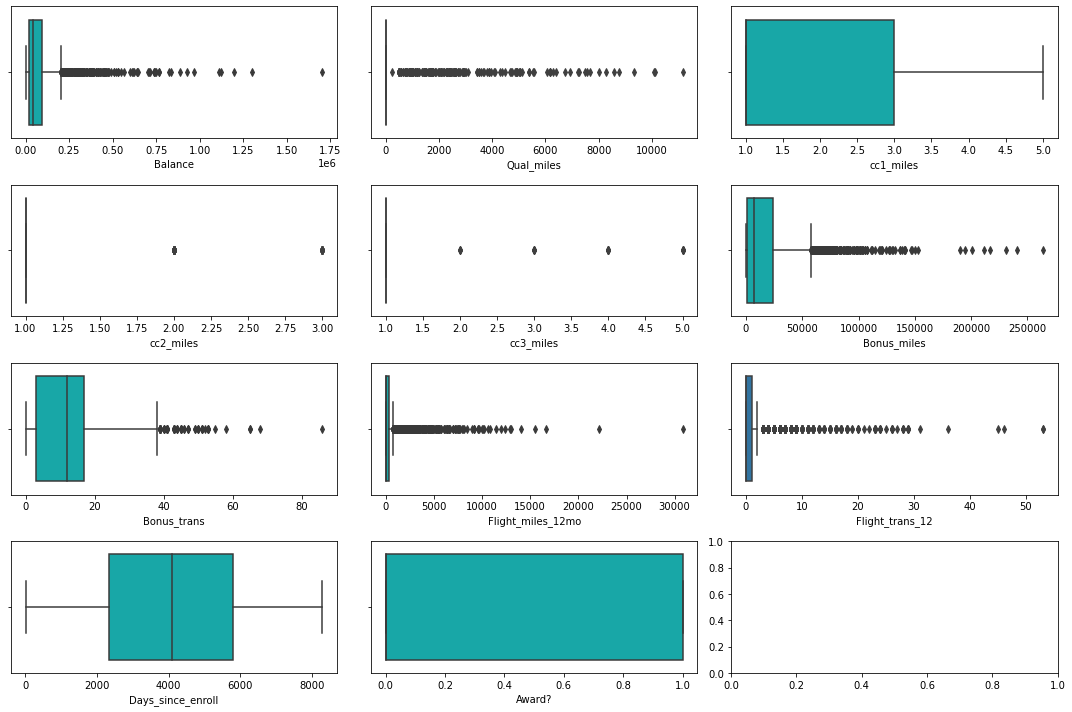

In [78]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(Airlines1.Balance, ax=ax[0,0],color='c')
sns.boxplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.boxplot(Airlines1.cc1_miles, ax=ax[0,2],color='c')
sns.boxplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.boxplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.boxplot(Airlines1.Bonus_miles, ax=ax[1,2],color='c')
sns.boxplot(Airlines1.Bonus_trans, ax=ax[2,0],color='c')
sns.boxplot(Airlines1.Flight_miles_12mo, ax=ax[2,1],color='c')
sns.boxplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.boxplot(Airlines1.Days_since_enroll, ax=ax[3,0],color='c')
sns.boxplot(Airlines1["Award?"] , ax=ax[3,1],color='c')
plt.tight_layout()
plt.show()

Data is Normally Distributed using Displot

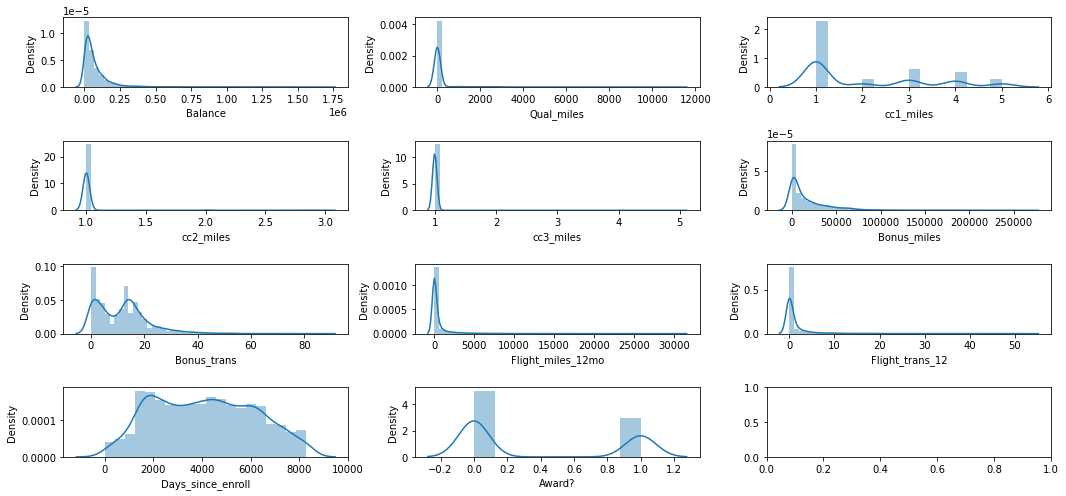

In [80]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(Airlines1.Balance, ax=ax[0,0])
sns.distplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.distplot(Airlines1.cc1_miles, ax=ax[0,2])
sns.distplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.distplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.distplot(Airlines1.Bonus_miles, ax=ax[1,2])
sns.distplot(Airlines1.Bonus_trans, ax=ax[2,0])
sns.distplot(Airlines1.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.distplot(Airlines1.Days_since_enroll, ax=ax[3,0])
sns.distplot(Airlines1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

In [81]:
Airlines2 = Airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
Airlines2_transformed = power_transform(Airlines2, method='yeo-johnson')

In [82]:
Airlines2=pd.DataFrame(Airlines2_transformed,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 
Airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


## Hierarchial Clustering

### 'Average' Linkage Method

Text(0.5, 1.0, 'Dendogram')

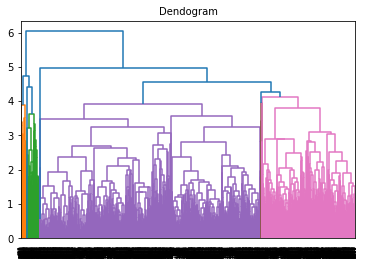

In [83]:
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='average'))
plt.title("Dendogram",size=10)

In [84]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [86]:
y_hc1 = hc1.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
Airlines['cluster'] = y_hc1
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


In [87]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



### 'Centroid(Ward)' Method

Text(0.5, 1.0, 'Dendogram')

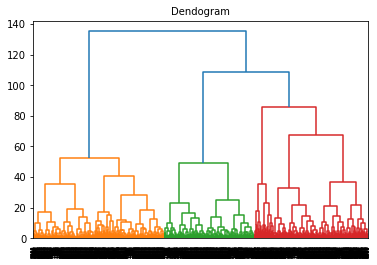

In [88]:
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='ward'))
plt.title("Dendogram",size=10)

In [89]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [90]:
y_hc2 = hc2.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])
Airlines['cluster'] = y_hc2
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [91]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



### 'Complete' linkage method

Text(0.5, 1.0, 'Dendogram')

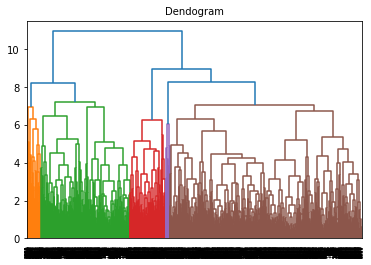

In [93]:
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='complete'))
plt.title("Dendogram",size=10)

In [94]:
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc3 = hc3.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])
Airlines['cluster'] = y_hc3
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [95]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



### 'Single' linkage method

Text(0.5, 1.0, 'Dendogram')

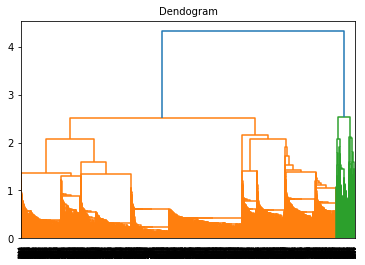

In [96]:
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='single'))
plt.title("Dendogram",size=10)

In [97]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
Airlines['cluster'] = y_hc4
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [98]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



### DBSCAN

In [99]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Airlines2)

DBSCAN(eps=0.8, min_samples=6)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0], dtype=int64)

In [101]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl

,cluster_db
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,5
3996,4
3997,6


In [102]:
Airlines3 = pd.concat([Airlines,cl],axis=1)
Airlines3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,6


In [103]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


Importing the Metrics for calculating Silhouette Score

In [105]:
s1=(metrics.silhouette_score(Airlines2_transformed,y_hc1))
s1

0.24511194875209383

In [106]:
s2=(metrics.silhouette_score(Airlines2_transformed,y_hc2))
s2

0.3240550069814065

In [107]:
s3=(metrics.silhouette_score(Airlines2_transformed,y_hc3))
s3

0.19985213995606269

In [108]:
s4=(metrics.silhouette_score(Airlines2_transformed,y_hc4))
s4

0.2971406781364072

In [110]:
s6=(metrics.silhouette_score(Airlines2_transformed,Airlines3.cluster_db))
s6

0.2340657983934542

#### Consolidating

In [111]:
t={'Model':['Average','Centrod','Complete','Single','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Average,0.245112
1,Centrod,0.324055
2,Complete,0.199852
3,Single,0.297141
4,DBScan,-0.150796
